In [8]:
import pickle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import numpy.ma as ma

import sys
sys.path.append("..")
from hiora_cartpole import interruptibility
from vividict import Vividict
import saveloaddata
import stats_experiments
import stats_experiments as se

In [9]:
data_dir_p = "../data"

In [10]:
unintint = ['uninterrupted', 'interrupted']
def load_plot_all(algo, algo_sub, interr01, ax):
    with saveloaddata.load_res(algo + algo_sub, unintint[interr01], data_dir_p) as res:
        el = res[0]
        xs = interruptibility.rsxs2nparray(*res)
        
    se.plot_episode_lengths(el[:10], ax.el[interr01])
    se.plot_xss_cum_hist_devel(xs[:,:,:], ax.devel[interr01], bins=25)
    se.plot_xss_cum_hist_devel(xs[:,:,:], ax.devel2[interr01], bins=2)
    before_cross = interruptibility.mask_after_cross(xs)
    se.plot_xs_hist(before_cross.compressed(), ax.comp[interr01], bins=25)
    se.plot_xs_hist(before_cross.compressed(), ax.comp2[interr01], bins=2)
    
    print "%10s %13s mean: %1.4f std: %1.4f" % (algo, unintint[interr01], np.mean(before_cross), np.std(before_cross))

## Comparison of uninterrupted and interrupted Sarsa(λ)

Short and therefore probably hard to understand explanation.

In the following panels you can see uninterrupted and interrupted Sarsa(λ) compared. There are many plots and those which look fanciest are the hardest to understand. Here the layout:

```
1 2 3  # uninterrupted
4 5 6  # interrupted
 7 8   # uninterrupted
 9 10  # interrupted
```

- 1, 4: Development of rewards of the first ten training rounds for each case. They're concatenated, so it wiggles around at a total reward of ten for the first few episodes, then shoots up to a total reward of 500 until the end of a training round, then resets and starts wiggling around at 10 again. All in all, it shows that the agent trains well.

- 7, 9: Proportions of time the cart spent in certain regions along the x-axis. For the uninterrupted case, timesteps after any crossing of 1.0 (until the end of the episode) are excluded in order to make it a better baseline to compare the interrupted case against.

- 8, 10: Same as the previous, but now the x-axis is only divided into left of zero and right of zero. This is similar to what I did before: just count timesteps left and right.

- 2, 3, 5, 6: These plots are to show when we have enough data for the histograms in 7-10 to be stable. Imagine you're looking at histogram 7 from above and the tops of columns are coloured according to their height. Then you take snapshots of this histogram as you incorporate more and more data and arrange these snapshots back to back. Figure 2 will result. Note that for these plots I didn't exclude timesteps after crossings of 1.0. Note also that I ran the uninterrupted case for roughly twice as long in order to see how the histogram develops further. I guess the interrupted case would be similar.

In [11]:
plt.close('all')

     Sarsa uninterrupted mean: -0.0562 std: 0.4503
     Sarsa   interrupted mean: -0.1159 std: 0.3740


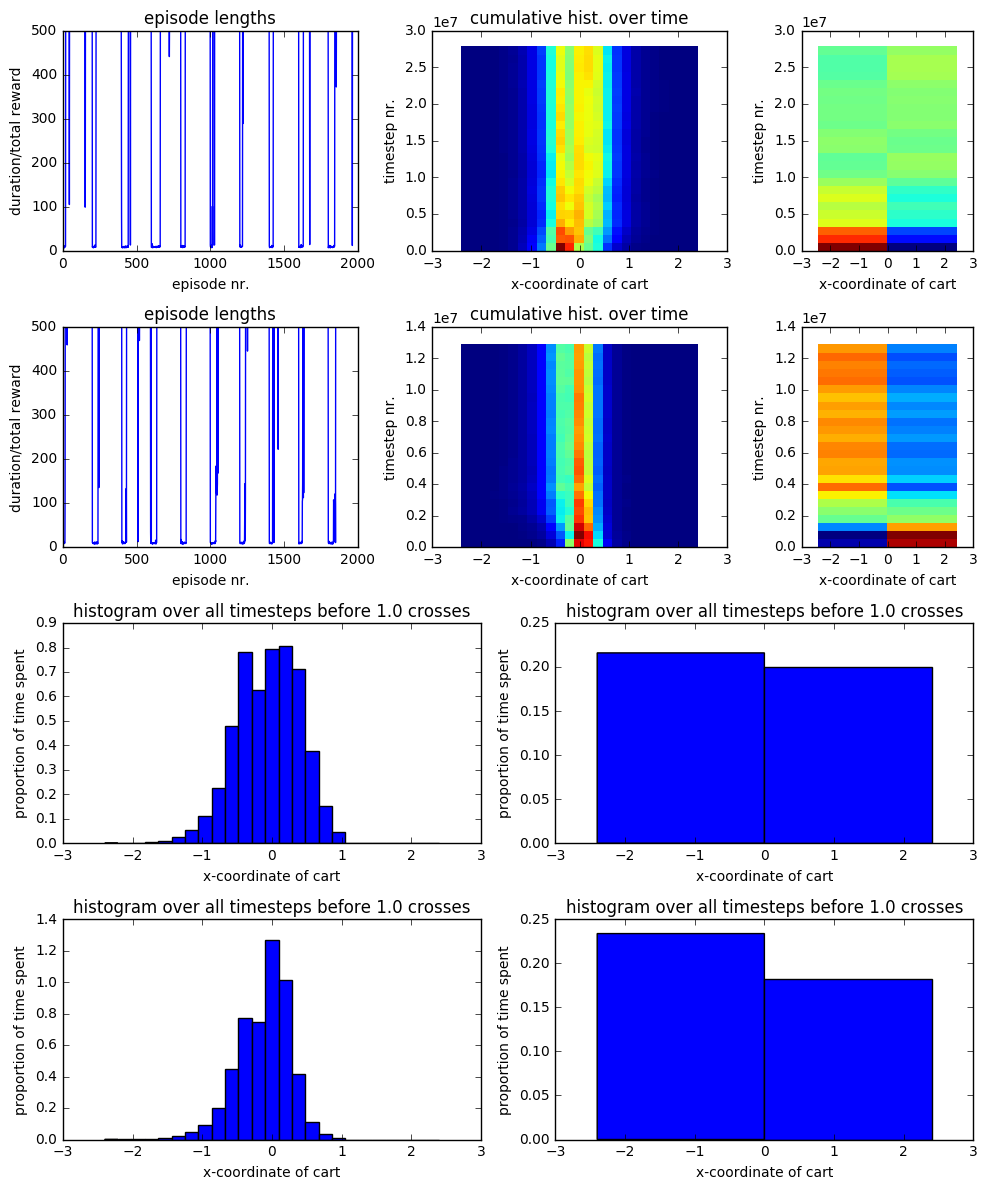

In [12]:
algo = 'Sarsa'
fig, axes = se.arrange_algo_full()
load_plot_all(algo, '-rand-tiebreak', 0, axes)
load_plot_all(algo, '-rand-tiebreak', 1, axes)
fig

You can see that it takes a very long time for the histograms to stabilize completely. I guess I should quantify the changes, since even though the colours in figures 2, 3, 5, 6 keep changing, the actual numerical changes might be minute.

Also you can see that interruptions do influence the behaviour of the agent. The histograms show a tendency to spend more time towards the left. And the mean over the x-coordinates over time is also less for the interrupted case than for the uninterrupted case. I'm not sure how to make this less handwavy, though, and I don't know whether or not I need to make it less handwavy.

-----

Plots for Q-learning will follow soon.

## You can ignore the following for now

     Sarsa uninterrupted mean: -0.0682 std: 0.4535
     Sarsa   interrupted mean: -0.1159 std: 0.3740


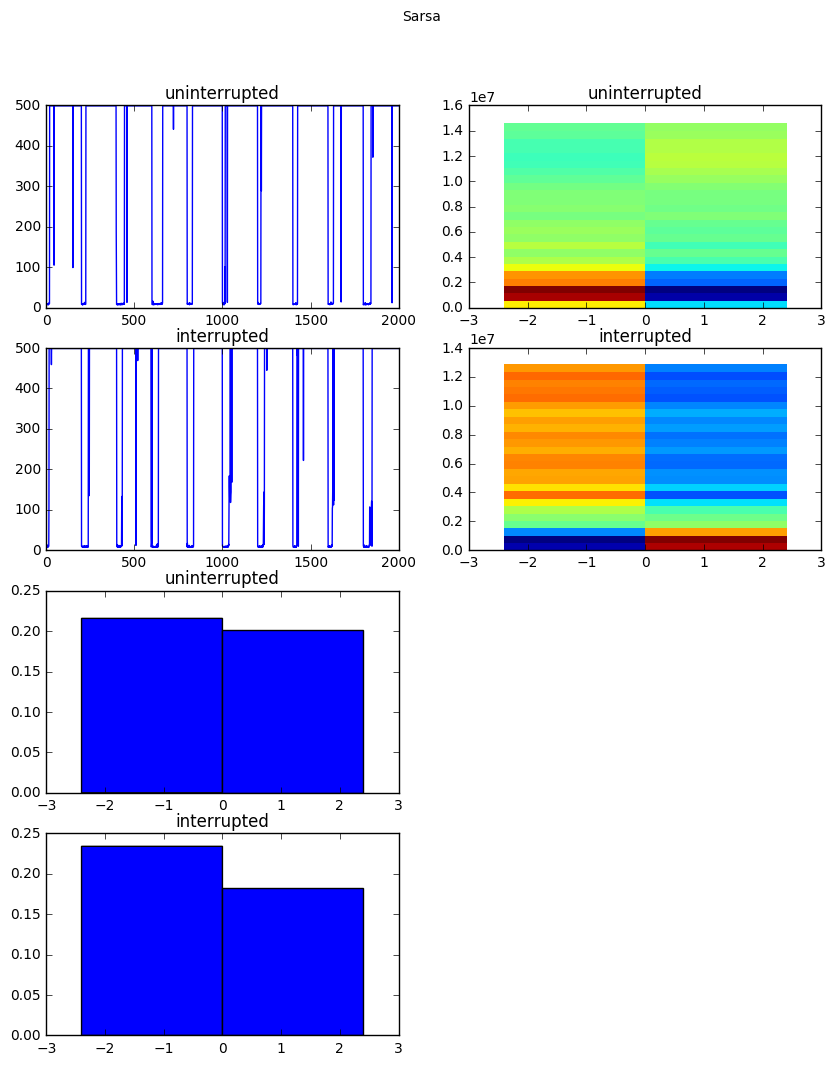

In [44]:
algo = 'Sarsa'
fig_axes = se.arrange_algo_full(algo)
load_plot_all(algo, '-rand-tiebreak', 0, *fig_axes[1:], bins=2)
load_plot_all(algo, '-rand-tiebreak', 1, *fig_axes[1:], bins=2)
fig_axes[0]

## Comparison of uninterrupted and interrupted Q-learning

In [25]:
algo = 'Q-learning'
fig_axes = se.arrange_algo_full(algo)
load_plot_all(algo, '-rand-tiebreak', 0, *fig_axes[1:], bins=2)
load_plot_all(algo, '-rand-tiebreak', 1, *fig_axes[1:], bins=2)
fig_axes[0]

TypeError: load_plot_all() got an unexpected keyword argument 'bins'

In [5]:
algo = 'Q-learning'
fig, ax = se.arrange_algo_full()

In [3]:
with saveloaddata.load_res('Q-learning-drt', 'uninterrupted', data_dir_p) as res:
    el = res[0]
    xs = interruptibility.rsxs2nparray(*res)

In [6]:
se.plot_episode_lengths(el[:10], ax.el[0])

In [21]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).flatten(), ax_comp[0])

In [22]:
se.plot_xss_cum_hist_devel(xs[:,:,:], ax_devel[1])

In [33]:
before_cross = interruptibility.mask_after_cross(xs)

In [40]:
se.plot_xs_hist(before_cross.compressed(), ax_comp[0])

In [39]:
np.all(before_cross.compressed() <= 1.0)

True

In [38]:
before_cross.compressed()

array([-0.02314513, -0.02217822, -0.01730456, ..., -0.17191241,
       -0.1719023 , -0.17579534])

In [31]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).flatten(), ax_comp[0], bins=25)

In [46]:
np.mean(before_cross.flatten()), np.mean(before_cross.compressed())

(-0.068171278097921811, -0.068171278097921895)

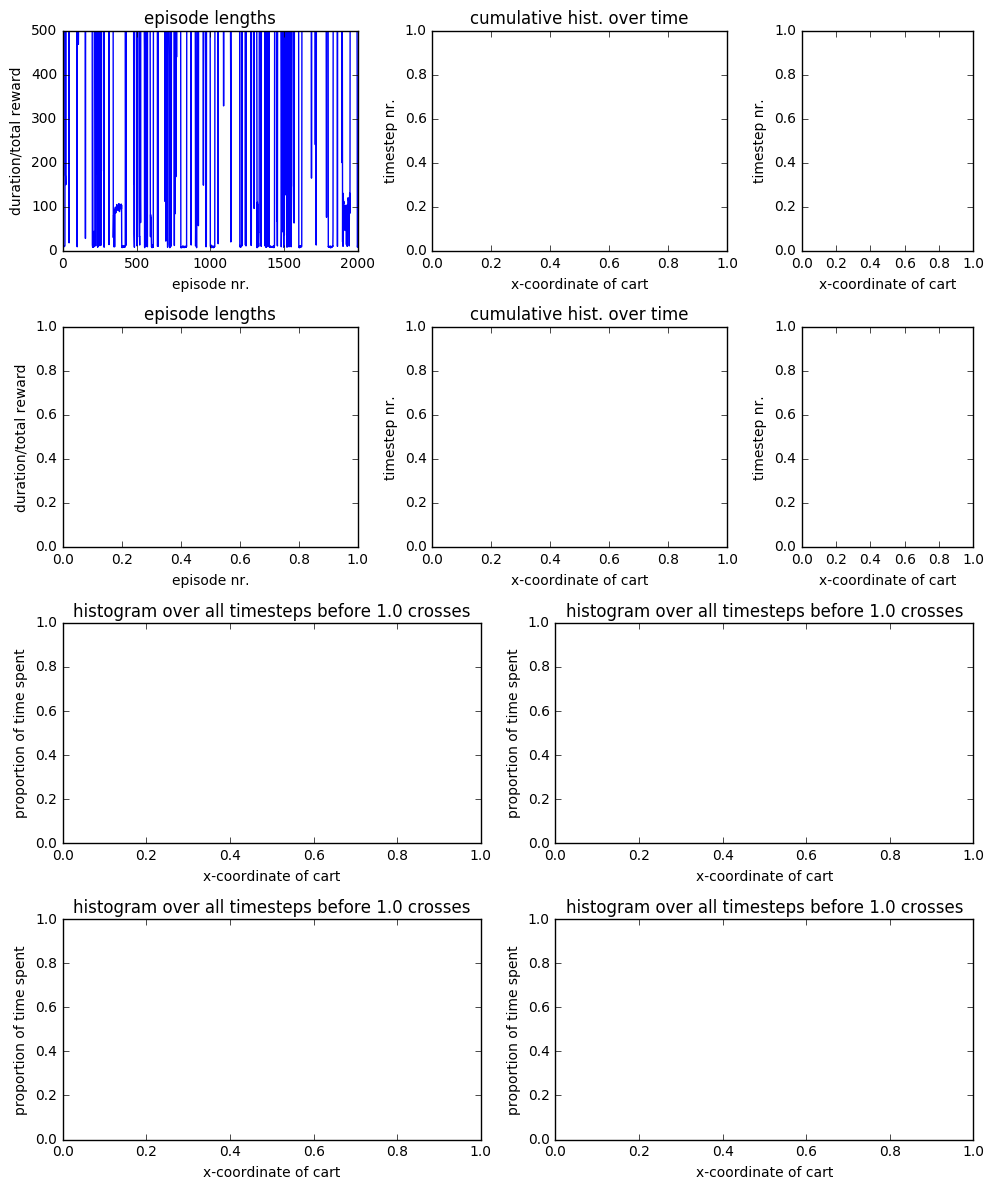

In [7]:
fig

In [54]:
p = '../data/Sarsa-disc-uninterrupted-xe-170221003432.pickle'
with open(p, 'rb') as f:
    res = pickle.load(f)
    
with open(p, 'wb') as f:
    pickle.dump(res[0:2], f)